In [3]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearAc2 = pd.read_csv('queries_results/Poland/POL monthyear ac2 count.csv', header = 0)
POLmonthyearAc2["Time"]=pd.to_datetime(POLmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

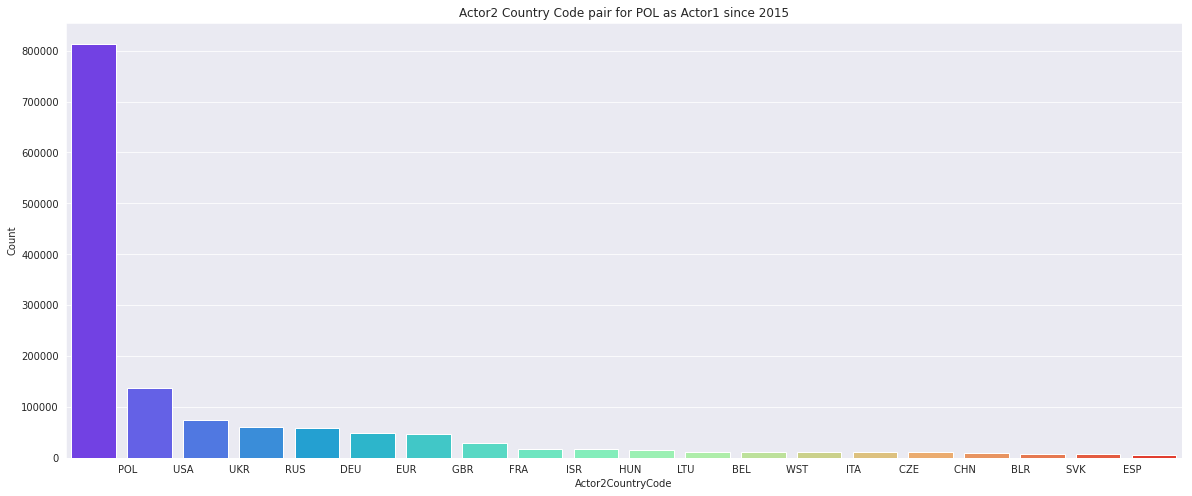

In [4]:
s = POLmonthyearAc2.groupby("Actor2CountryCode").sum().sort_values(by="Count", ascending=False).head(20)
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Country Code pair for POL as Actor1 since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

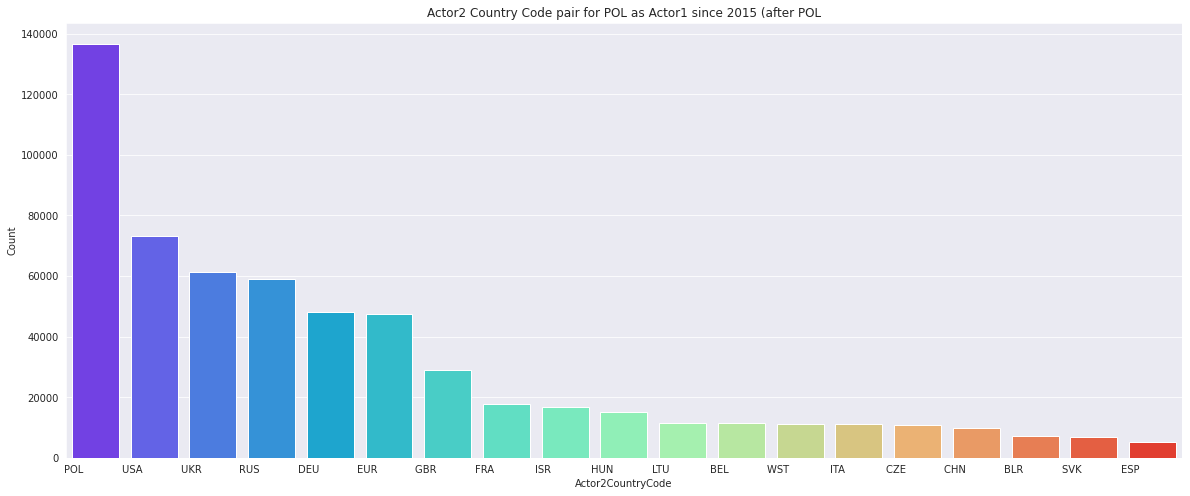

In [5]:
s = POLmonthyearAc2.groupby("Actor2CountryCode").sum().sort_values(by="Count", ascending=False).head(20)[1:]
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Country Code pair for POL as Actor1 since 2015 (after POL")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

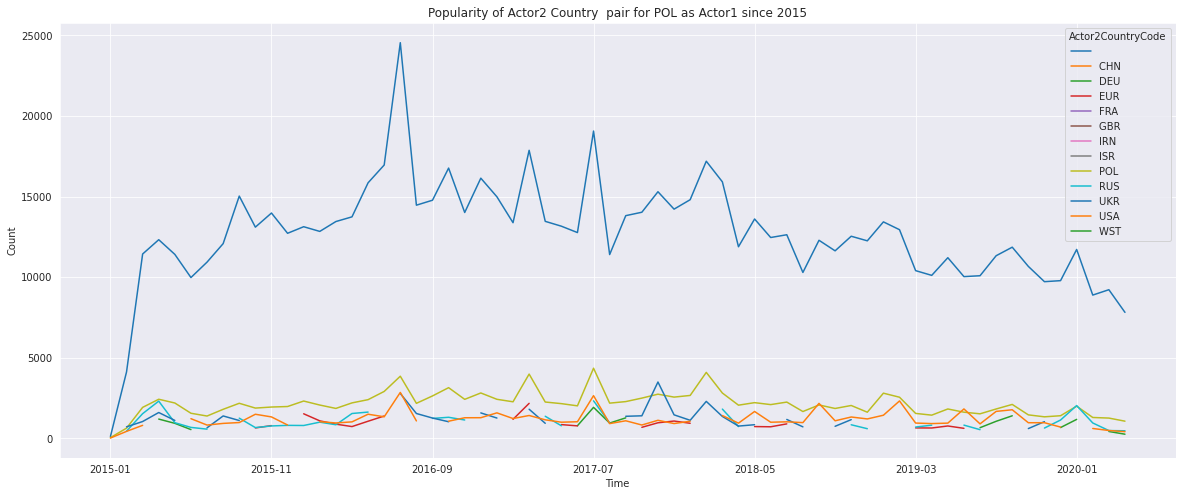

In [6]:
s = POLmonthyearAc2.groupby(["Actor2CountryCode", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(5)
s = s.groupby(["Time","Actor2CountryCode"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor2 Country  pair for POL as Actor1 since 2015")
g.figure.set_size_inches(20,8)

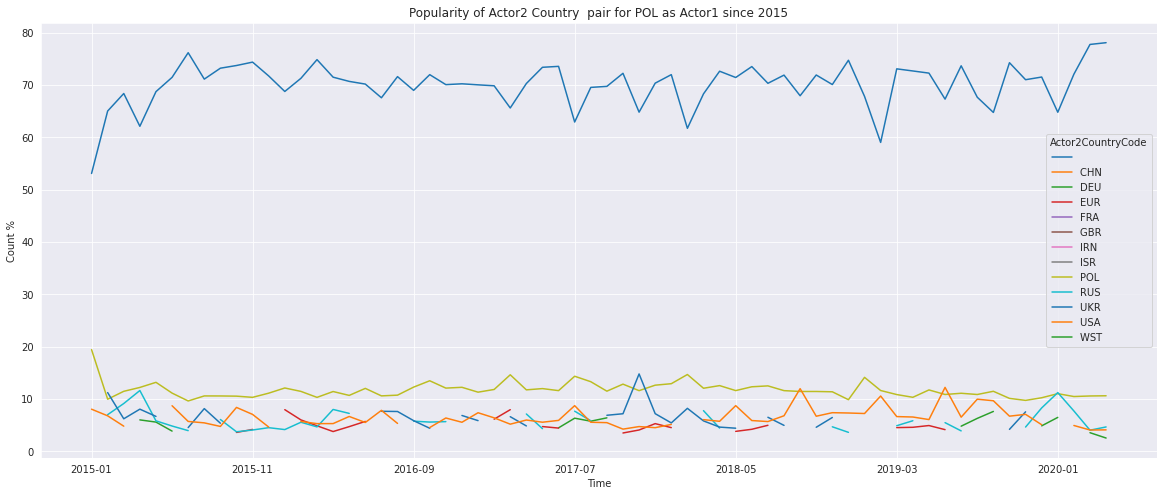

In [7]:
s = POLmonthyearAc2.groupby(["Actor2CountryCode", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(5)
s = s.groupby(["Time","Actor2CountryCode"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor2 Country  pair for POL as Actor1 since 2015")
g.figure.set_size_inches(20,8)